# 1. Import necessary Libraries 

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 2. Data Collection & Importing the data

In [2]:
adipose_tissue_data = pd.read_csv("WC_AT.csv")
adipose_tissue_data

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


# 3. Data Understanding

## 3.1 Perform Initial Analysis

In [3]:
adipose_tissue_data.shape

(109, 2)

In [4]:
adipose_tissue_data.isna().sum()

Waist    0
AT       0
dtype: int64

In [6]:
adipose_tissue_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [7]:
adipose_tissue_data.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [8]:
adipose_tissue_data.dtypes

Waist    float64
AT       float64
dtype: object

## 3.2 Perform Assumptions Check

# =============================================================

## 1. Linearity Test

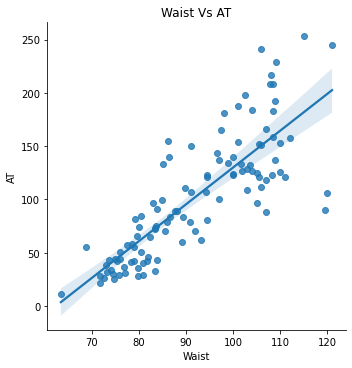

In [10]:
sns.lmplot(x='Waist', y="AT", data=adipose_tissue_data)
plt.title("Waist Vs AT")
plt.show()

### Linearity test is Failed

## 2. Normality Test

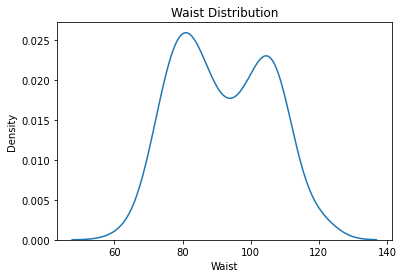

In [12]:
sns.distplot(a=adipose_tissue_data["Waist"],hist = False)
plt.title("Waist Distribution")
plt.show()

### Normality test is Failed

## 3. No Multilinearity 
Because only one input

## 4. No AutoRegression
Because no datetime datatype

## 5. Homoscedasticity II 6. Zero Residual mean

This can be performed after Model Training

# =============================================================

# 4. Data Preparation

No need to do any changes here

In [13]:
adipose_tissue_data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


# 5. Model Building II 6. Model Training

Linear Regression
1. Statsmodels
2. sklearn

### 1. Using Statsmodels

In [15]:
import statsmodels.formula.api as smf

In [18]:
linear_model = smf.ols(formula = "AT~Waist", data=adipose_tissue_data).fit()
linear_model

In [20]:
linear_model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

# 7. Model Testing

### Manual Prediction

In [31]:
# y = mx+c
# If x = 50 then y =??

(3.458859*50)+ (-215.981488)

-43.03853800000002

In [30]:
# y = mx+c
# If x = 60 then y =??

(3.458859*60)+ (-215.981488)

-8.449948000000006

In [28]:
# y = mx+c
# If x = 70 then y =??

(3.458859*70)+ (-215.981488)

26.138641999999976

In [29]:
# y = mx+c
# If x = 80 then y =??

(3.458859*80)+ (-215.981488)

60.72723199999996

### Automatic Prediction

In [32]:
adipose_tissue_data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [34]:
test_data = pd.DataFrame(data = {"Waist":[50,60,70,80]})
test_data                        

,Waist
0,50
1,60
2,70
3,80


In [35]:
linear_model.predict(test_data)

0   -43.038518
1    -8.449924
2    26.138669
3    60.727263
dtype: float64

# 8. Model Evaluation

## -----------Park------------

# 9. Model Deployement

In [36]:
from pickle import dump

In [38]:
dump(linear_model,open("adipose_tissue_intell.pkl","wb"))

In [39]:
from pickle import load

In [41]:
loaded_intelligence_file = load(open("adipose_tissue_intell.pkl","rb"))

In [42]:
loaded_intelligence_file.predict(test_data)

0   -43.038518
1    -8.449924
2    26.138669
3    60.727263
dtype: float64

# Conclusion

* Assumptions Tests are failed for this model.
* Some predicted values of waist are in negative which is not possible practically
* This Model is not good for the future prediction regarding the No. of Adipose tissue with waist circumference.
* So, we need some transformations or future Engineering is needed here.